# Prepare grids for gravity inversion

In [24]:
import pygmt
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [25]:
cd

C:\Users\matthewt


In [26]:
cd Documents\Python_Scripts\inversion_layers

C:\Users\matthewt\Documents\Python_Scripts\inversion_layers


In [87]:
figheight=90 # in mm

# for Ross Embayment
# ris_xl= -760_000
# ris_yl= -2_200_000 #N extent
# ris_xh= 600_000
# ris_yh= -350_000 #S extent

# for RIS only
# ris_xl=-760_000
# ris_xh=600_000
# ris_yl=-1_600_000
# ris_yh=-240_000

# disco deep wide
ris_xl= 180_000
ris_yl= -1_300_000 #N extent
ris_xh= 440_000
ris_yh= -1_020_000 #S extent

figwidth=figheight*(ris_xh-ris_xl)/(ris_yh-ris_yl)
risratio = (ris_yh - ris_yl) / (figheight/1000)
risreg = str(ris_xl) + '/' + str(ris_xh) + '/' + str(ris_yl) + '/' + str(ris_yh) #W/E/S/N
risproj = "x1:" + str(risratio)
antreg = "-3330000/1900000/-3330000/1850000"
risproj_ll = "s0/-90/-71/1:" + str(risratio)

def make_fig():
    global fig, pos_str
    fig = pygmt.Figure()
    with pygmt.config(MAP_FRAME_TYPE = 'inside'):
        fig.coast(region = risreg, projection = risproj_ll, land = 'white', water = 'white', frame = ["nwse", "xf100000", "yf100000", "g0"],verbose='e')
    # set colorbar params
    barwidth = figwidth/10 * 0.4 # color bar width is 40% of the map width, in cm
    pos_str = 'jTL+w' + str(barwidth) + 'c+jTL+o1c/0.5c+h+ml+e'
    pygmt.config(FONT_ANNOT_PRIMARY = '4p,white', FONT_LABEL = '6p,white', 
                      MAP_ANNOT_MIN_SPACING = '0p', MAP_ANNOT_OFFSET_PRIMARY = '0.5p', MAP_TICK_PEN_PRIMARY = '0.4p,white', 
                      MAP_TICK_LENGTH_PRIMARY = '2p', MAP_FRAME_PEN = '0.3p,white', MAP_LABEL_OFFSET = '4p')


In [131]:
file='D:/RIGGS_data/bedmap1/POINT_DATA/bedmap_all.csv'

df=pd.read_csv(
    file, 
    header=0, 
    index_col=False, 
    sep=',', 
    names=('MissionID','Latitude','Longitude','IceThickness','SurfaceElevation','WaterColumnThickness','BedElevation'),
    skipinitialspace=True,
    #     delim_whitespace=True
    dtype={'BedElevation': float},
    na_values=[" ", "#####", "9999", "-9999", 'nan']   #set the Nan Values
)
             
# print(df.head())    #pring the first 5 rows
#df=df.drop(df[df['BedElevation']==-9999].index)

df1 = df[df['BedElevation'].notna()]    #remove NaNs
df2 = df1[df1.MissionID!=42, df1.MissionID!=41]
# df2 = df1[df1.BedElevation !=-9999]     #remove BedElevation=-9999
# df3 = df2[df2.BedElevation !=9999]      #remove BedElevation=9999
# df4 = df3.drop(index=[189277,347242])   # remove two rows, based on labels, with bedelevation errors

# print(df.BedElevation.unique())
# df1[df1.MissionID==42]
df1[df1.Latitude==-79.66451]

# print(len(df))
# print(len(df1))
# print(len(df2))
# print(len(df2))
# print(len(df3))
# print(len(df4))

# bedmap1_riggs=pd.read_csv('D:/RIGGS_data/bedmap1/POINT_DATA/bedmap_all.csv', header=0, index_col=None)
# bedmap1_riggs

# make_fig()
# pygmt.makecpt(cmap='batlowW', series='-1200/100', background='o')
# fig.grdimage(grid ='bedmap2_bed.tif', cmap =True, projection=risproj, region=risreg, nan_transparent=True)

# fig.plot(data='../shapefiles/polygon_safety.shp', pen='0.8p,white', dpi='500', verbose='e')
# fig.plot(data='../shapefiles/MEaSUREs_groundingline.shp' , region = risreg, projection = risproj, pen = '1p,black', verbose='e')
# fig.plot(data='../shapefiles/MEaSUREs_coastline.shp', pen='1p,black', verbose='e')


# fig.plot(x=df2.Longitude, y=df2.Latitude, color=df2.BedElevation,
#         region=risreg, projection=risproj_ll,   style='c0.1c', cmap=True, pen='.02p,magenta')
# fig.colorbar(cmap =True, position = pos_str,frame = 'xa100+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
# fig.show()


,MissionID,Latitude,Longitude,IceThickness,SurfaceElevation,WaterColumnThickness,BedElevation
345833,42,-79.66451,165.1652,366.0,21.0,NaN,-345.0


In [101]:
df1.to_csv('D:/RIGGS_data/bedmap1/POINT_DATA/bedmap1_bedelevation.csv', index=False)

In [110]:
!gmt gmtselect

gmt gmtselect [core] 6.2.0 [64-bit] - Select data table subsets based on multiple spatial criteria

usage: gmt gmtselect [<table>] [-A<min_area>[/<min_level>/<max_level>][+a[g|i][s|S]][+r|l][+p<percent>]]
	[-C<ptfile|lon/lat>+d<dist>] [-D<resolution>][+f] [-E[f][n]] [-F<polygon>] [-G<gridmask>] [-J<args>]
	[-I[cfglrsz] [-L<lfile>+d<dist>[+p]] [-N<info>] [-R<west>/<east>/<south>/<north>[+r]]
	[-V[<level>]] [-Z<min>[/<max>][+c<col>][+a][+i]] [-a<col>=<name>[,...]] [-b[i|o][<ncol>][t][w][+l|b]]
	[-d[i|o]<nodata>] [-e[~]<pattern>] [-f[i|o]<info>] [-g[a]x|y|d|X|Y|D|[<col>]z<gap>[+n|p]]
	[-h[i|o][<nrecs>][+c][+d][+m<segheader>][+r<remark>][+t<title>]] [-i<cols>[+l][+d<divide>][+s<scale>][+o<offset>][,...][,t[<word>]]]
	[-o<cols>[,...][t[<word>]]] [-q[i|o][~]<rows>[,...][+c<col>][+a|f|s]] [-s[<cols>][+a][+r]]
	[-wa|y|w|d|p<period][/<phase>][+c<col>]] [-:[i|o]] [--PAR=<value>]

	OPTIONS:
	<table> is one or more data files (in ASCII, binary, netCDF).
	   If no files are given, standard input is

## BED

#### Bedmap2 bed

In [23]:
!gmt grdmath -Df bedmap2_bed.tif gl04c_geiod_to_WGS84.tif ADD = bedmap2_bed_WGS_84.tif

In [44]:
!gmt grdsample bedmap2_bed_WGS_84.tif -Glayers/bedmap2_bed_WGS_84_RIS_5k.nc -R-760000/600000/-1600000/-240000 -I5000+e

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [32]:
!gmt grd2xyz layers/bedmap2_bed_WGS_84_RIS_5k.tif > bedmap2_bed_WGS_84_RIS_5k.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


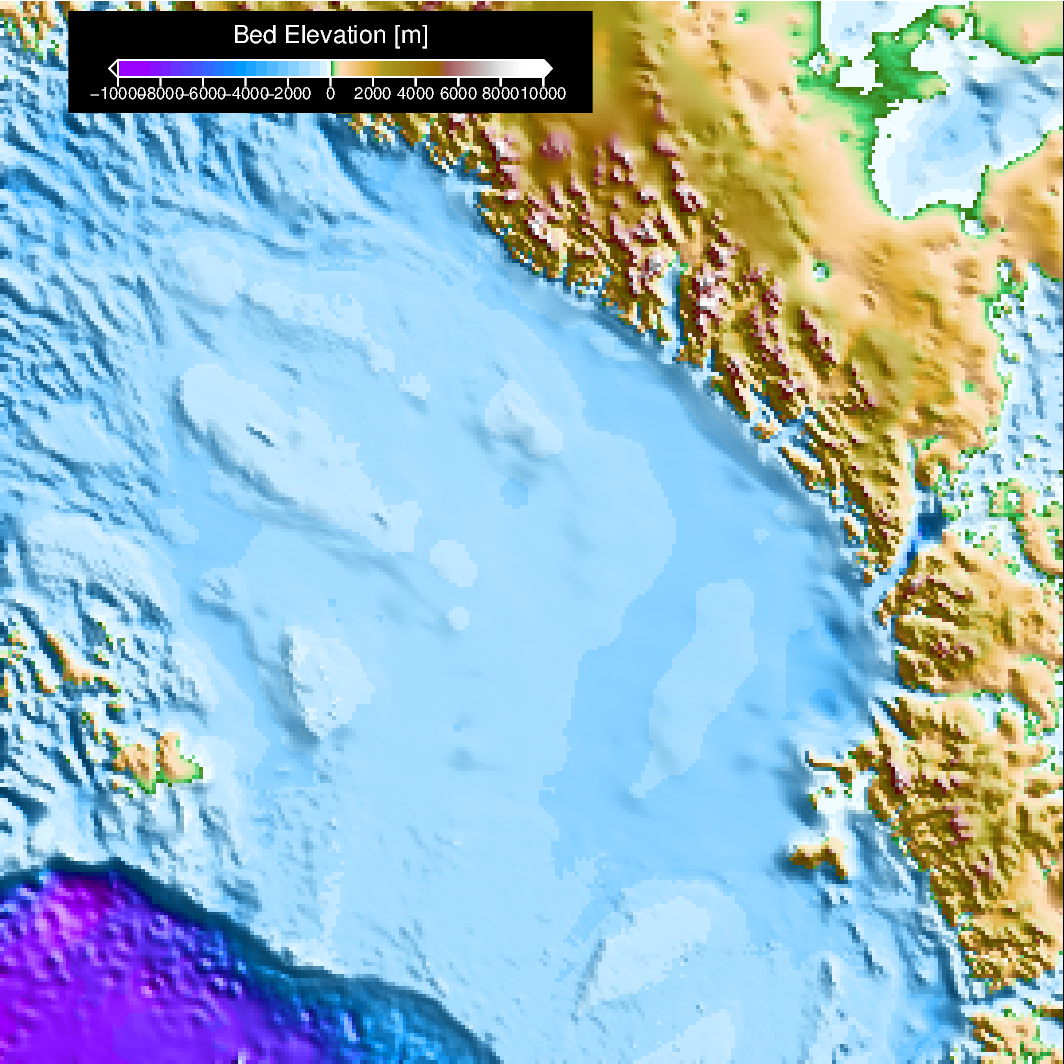

In [28]:
make_fig()
fig.grdimage(grid ='layers/bedmap2_bed_WGS_84_RIS_5k.nc', cmap ='globe', projection=risproj, shading='grdgradient+a45/45+nt1+m0', region=risreg, nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa2000+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

#### Bedmap2 bed minus bedmachine bed

In [12]:
!gmt grdmath -Df layers/bedmap2_bed_WGS_84_RIS_5k.nc layers/BedMachine_bed_5k.nc SUB = layers/tmp_bedmap2_bedmachine_bed_diff.nc 

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


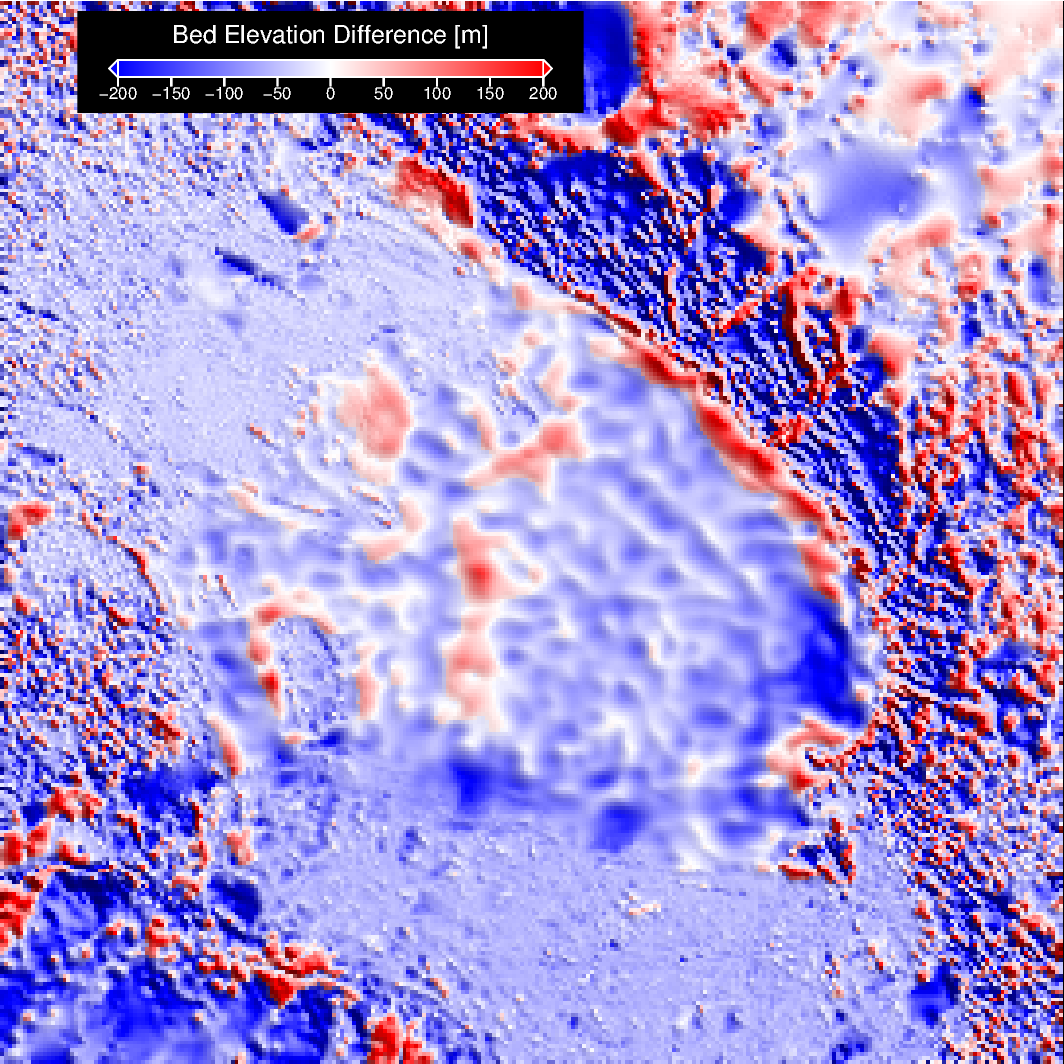

In [23]:
make_fig()
pygmt.makecpt(cmap='polar', series='-200/200', background='o')
fig.grdimage(grid ='layers/tmp_bedmap2_bedmachine_bed_diff.nc', cmap =True, projection=risproj, shading='grdgradient+a45/45+nt1+m0', region=risreg, nan_transparent=True)
fig.colorbar(cmap =True, position = pos_str,frame = 'xa50+l"Bed Elevation Difference [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## BED

#### BedMachine bed

In [31]:
!gmt grdsample BedMachineAntarctica_2020-07-15_v02.nc?bed -Glayers/BedMachine_bed_5k.nc -R-760000/600000/-1600000/-240000 -r -I5000+e

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [12]:
!gmt grd2xyz layers/BedMachine_bed_5k.nc > layers/BedMachine_bed_5k.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


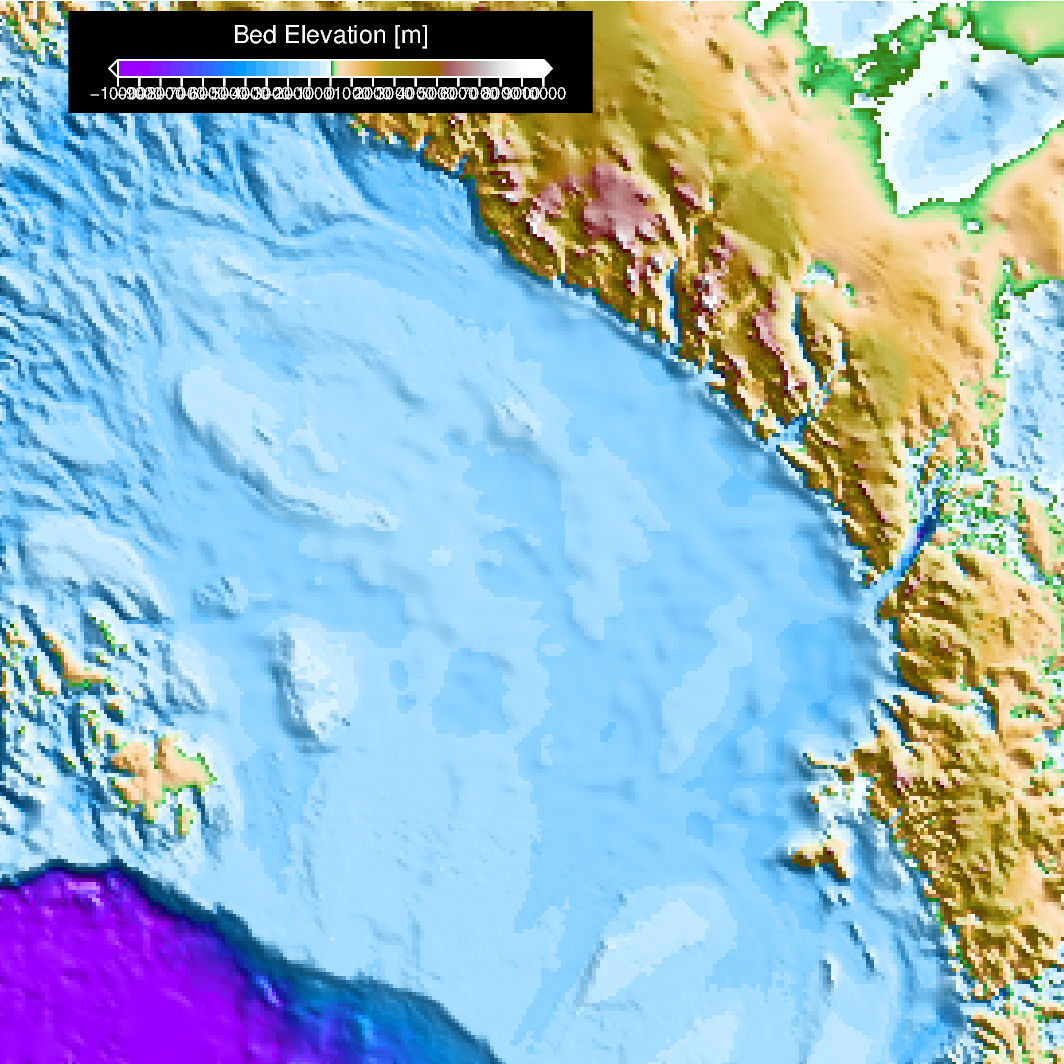

In [19]:
make_fig()
fig.grdimage(grid ='layers/BedMachine_bed_5k.nc', cmap ='globe', projection=risproj, shading='grdgradient+a45/45+nt1+m0', region=risreg, nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa1000+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

# Setup CSV's in format for inversion

In [86]:
def edit_csvs(file_in, file_out, rho):
    df = pd.read_csv(file_in, header=None, index_col=None, sep='\t', names=('X','Y','Z'))
    df['RHO']=rho
    df['CP']=0
    df.to_csv(file_out, sep=',', index=False)

In [90]:
edit_csvs('SURFACE_1k.csv', 'ICE_1k.csv', 0.92)

In [91]:
edit_csvs('ICEBASE_1k.csv', 'WATER_1k.csv', 1.03)

In [92]:
edit_csvs('BED_5k.csv', 'SEDIMENT_5k.csv', 2.3)

In [93]:
edit_csvs('BASEMENT_5k.csv', 'CRUST_5k.csv', 2.8)

In [94]:
edit_csvs('MOHO_5k.csv', 'MANTLE_5k.csv', 3.3)

In [168]:
df = pd.read_csv('GRAV_50k_fromgrid.csv', header=None, index_col=None, sep='\t', names=('X','Y','FA'))
df['Z']=800
df['FACP']=df.FA
df.dropna(inplace=True)
df.to_csv('GRAV_50k.csv', sep=',', index=False)
df

,X,Y,FA,Z,FACP
0,-735000,-275000,0.801172,800,0.801172
1,-685000,-275000,-24.302734,800,-24.302734
2,-635000,-275000,-64.930466,800,-64.930466
3,-585000,-275000,33.173439,800,33.173439
5,-485000,-275000,0.656205,800,0.656205
...,...,...,...,...,...
724,365000,-1575000,-1.894532,800,-1.894532
725,415000,-1575000,-65.063675,800,-65.063675
726,465000,-1575000,-55.844139,800,-55.844139
727,515000,-1575000,-77.757812,800,-77.757812


In [ ]:
transformer = Transformer.from_crs("epsg:4326", "epsg:3031")
transformer.transform(-82, 150)